In [1]:
from IPython.display import HTML

input_form = """
<div style="background-color:gainsboro; border:solid black; width:300px; padding:20px;">
Variable Name: <input type="text" id="var_name" value="foo"><br>
Variable Value: <input type="text" id="var_value" value="bar"><br>
<button onclick="set_value()">Set Value</button>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var var_name = document.getElementById('var_name').value;
        var var_value = document.getElementById('var_value').value;
        var command = var_name + " = '" + var_value + "'";
        console.log("Executing Command: " + command);
        
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
    }
</script>
"""

HTML(input_form + javascript)

In [2]:
from IPython.display import HTML
from cStringIO import StringIO

# We'll use HTML to create a control panel with an
# empty image and a number of navigation buttons.

disp_html = """
<div class="animation" align="center">
<img id="anim_frame" src=""><br>
<button onclick="prevFrame()">Prev Frame</button>
<button onclick="reverse()">Reverse</button>
<button onclick="pause()">Pause</button>
<button onclick="play()">Play</button>
<button onclick="nextFrame()">Next Frame</button>
</div>
"""

# now the javascript to drive it.  The nextFrame() and prevFrame()
# functions will call the kernel and pull-down the frame which
# is generated.  The play() and reverse() functions use timeouts
# to repeatedly call nextFrame() and prevFrame().

javascript = """
<script type="text/Javascript">
var count = -1;  // keep track of frame number
var animating = 0;  // keep track of animation direction
var timer = null;
var kernel = IPython.notebook.kernel;

function output(out_type, out){
    data = out.data["text/plain"];
    document.getElementById("anim_frame").src = data.substring(1, data.length - 1);
    
    if(animating > 0){
        timer = setTimeout(nextFrame, 0);
    }
    else if(animating < 0){
        timer = setTimeout(prevFrame, 0);
    }
}

var callbacks = {'output' : output};

function pause(){
    animating = 0;
    if(timer){
        clearInterval(timer);
        timer = null;
    }
}

function play(){
    pause();
    animating = +1;
    nextFrame();
}

function reverse(){
    pause();
    animating = -1;
    prevFrame();
}

function nextFrame(){
    count += 1;
    var msg_id = kernel.execute("disp._get_frame_data(" + count + ")", callbacks, {silent:false});
}

function prevFrame(){
    count -= 1;
    var msg_id = kernel.execute("disp._get_frame_data(" + count + ")", callbacks, {silent:false});
}

// display the first frame
setTimeout(nextFrame, 0);

</script>
"""

# Here we create a class whose HTML representation is the above
# HTML and javascript.  Note that we've hard-coded the global
# variable name `disp` in the Javascript, so you'll have to assign
# the resulting object to this name in order to view it.

class DisplayAnimation(object):
    def __init__(self, anim):
        self.anim = anim
        self.fig = anim._fig
        plt.close(self.fig)
        
    def _get_frame_data(self, i):
        anim._draw_frame(i)
        buffer = StringIO()
        fig.savefig(buffer, format='png')
        buffer.reset()
        data = buffer.read().encode('base64')
        return "data:image/png;base64,{0}".format(data.replace('\n', ''))
    
    def _repr_html_(self):
        return disp_html + javascript

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
from matplotlib import animation
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 10, 1000)
    y = np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30)

# For now, we need to name this `disp` for it to work
disp = DisplayAnimation(anim)
disp

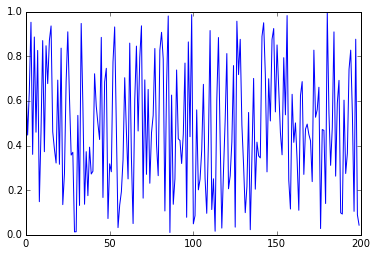

In [7]:
def save_to_mem(fig):
    buffer = StringIO()
    fig.savefig(buffer, format='png')
    buffer.reset()
    data = buffer.read().encode('base64')
    return "data:image/png;base64,{0}".format(data.replace('\n', ''))

fig, ax = plt.subplots()
ax.plot(rand(200))

In [8]:
from math import pi, sin
# Add an input form similar to what we saw above
input_form = """
<div style="background-color:gainsboro; border:solid black; width:600px; padding:20px;">
Code: <input type="text" id="code_input" size="50" height="2" value="sin(pi / 2)"><br>
Result: <input type="text" id="result_output" size="50" value="1.0"><br>
<button onclick="exec_code()">Execute</button>
</div>
"""

# here the javascript has a function to execute the code
# within the input box, and a callback to handle the output.
javascript = """
<script type="text/Javascript">
    function handle_output(out_type, out){
        console.log(out_type);
        console.log(out);
        var res = null;
         // if output is a print statement
        if(out_type == "stream"){
            res = out.data;
        }
        // if output is a python object
        else if(out_type === "pyout"){
            res = out.data["text/plain"];
        }
        // if output is a python error
        else if(out_type == "pyerr"){
            res = out.ename + ": " + out.evalue;
        }
        // if output is something we haven't thought of
        else{
            res = "[out type not implemented]";   
        }
        document.getElementById("result_output").value = res;
    }
    
    function exec_code(){
        var code_input = document.getElementById('code_input').value;
        var kernel = IPython.notebook.kernel;
        var callbacks = {'output' : handle_output};
        document.getElementById("result_output").value = "";  // clear output box
        var msg_id = kernel.execute(code_input, callbacks, {silent:false});
        console.log("button pressed");
    }
</script>
"""

HTML(input_form + javascript)

In [9]:
from pyh import *
page = PyH('My wonderful PyH page')
page.addCSS('myStylesheet1.css', 'myStylesheet2.css')
page.addJS('myJavascript1.js', 'myJavascript2.js')
page << h1('My big title', cl='center')
page << div(cl='myCSSclass1 myCSSclass2', id='myDiv1') << p('I love PyH!', id='myP1')
mydiv2 = page << div(id='myDiv2')
mydiv2 << h2('A smaller title') + p('Followed by a paragraph.')
page << div(id='myDiv3')
page.myDiv3.attributes['cl'] = 'myCSSclass3'
page.myDiv3 << p('Another paragraph')
page.printOut()

ImportError: No module named pyh

In [15]:
import bokeh
bokeh.sampledata.download()

Creating ~/.bokeh directory
Creating C:\Users\u6025397/.bokeh\data directory
Using data directory: C:\Users\u6025397/.bokeh\data


URLError: <urlopen error [Errno 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [13]:
import numpy as np

#from bokeh import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT


def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
#p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(AAPL['date']), AAPL['adj_close'], color='#A6CEE3', legend='AAPL')
p1.line(datetime(GOOG['date']), GOOG['adj_close'], color='#B2DF8A', legend='GOOG')
p1.line(datetime(IBM['date']), IBM['adj_close'], color='#33A02C', legend='IBM')
p1.line(datetime(MSFT['date']), MSFT['adj_close'], color='#FB9A99', legend='MSFT')
p1.legend.location = "top_left"

aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

p2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(aapl_dates, aapl, size=4, legend='close',
          color='darkgrey', alpha=0.2)

p2.line(aapl_dates, aapl_avg, legend='avg', color='navy')
p2.legend.location = "top_left"

output_file("stocks.html", title="stocks.py example")

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()